In [13]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

### KBF kernel

In [14]:
from sklearn.gaussian_process.kernels import RBF

In [40]:
x1 = np.array([[2,2,2,4]])
x2 = np.array([[4,5,6,7]])

In [41]:
k = RBF()
k(x1,x2)

array([[5.60279644e-09]])

In [42]:
def kernel(x1,x2):
    return np.exp((-1/2)*(np.sqrt((sum(sum(x1-x2)**2))))**2)

In [43]:
kernel(x1,x2)

5.602796437537288e-09

In [75]:
X_train = np.random.normal(0, 0.5, size=(20,2))

In [76]:
clf1 = OneClassSVM(kernel='rbf', nu=.12, gamma="auto")
clf1.fit(X_train)
train_pre = clf1.predict(X_train)
test_pre = clf1.predict(X_test)
np.mean(train_pre==1)

0.85

In [77]:
X_test = np.random.normal(0.2,1.5, size=(20,2))
y_test = clf1.predict(X_test)

In [78]:
X_in = X_train[train_pre==1]
X_out = X_test[test_pre==-1]

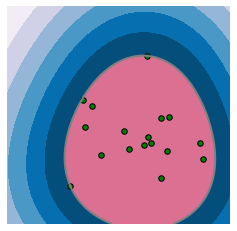

In [79]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1., 300), np.linspace(-1, 1.5, 300))
Z = clf1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(4,4))
a = plt.contour(xx, yy, Z, levels=0, linewidths=2, colors='gray')

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.axis('off')
s = 30
b1 = plt.scatter(X_in[:, 0], X_in[:, 1], c='green', s=s, edgecolors='k')
#b1 = plt.scatter(X_out[:, 0], X_out[:, 1], c='red', s=s, edgecolors='k')
plt.savefig('./images/svm_boundary.svg');

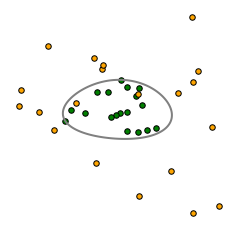

In [36]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1., 300), np.linspace(-1, 1.5, 300))
Z = clf1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(4,4))
a = plt.contour(xx, yy, Z, levels=0, linewidths=2, colors='gray')

#plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
#plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.axis('off')
s = 30
b1 = plt.scatter(X_in[:, 0], X_in[:, 1], c='green', s=s, edgecolors='k')
b1 = plt.scatter(X_test[:, 0], X_test[:, 1], c='orange', s=s, edgecolors='k')
plt.savefig('./images/svm_classifier.svg');